In [1]:
!pip install tensorflow==2.0

     |████████████████████████████████| 86.3 MB 54.3 MB/s 
     |████████████████████████████████| 449 kB 44.9 MB/s 
     |████████████████████████████████| 3.8 MB 46.2 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7539 sha256=a9610b3e15d8699b2b5d35a7db4a28c78884907585cb7f191748b0aeea160814
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Attempting uninstall: gast
    Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 

In [2]:
import tensorflow as tf

print(tf.__version__)

2.0.0


# Loading the data

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


base = '../input/face-expression-recognition-dataset/images/'

train_dir = os.path.join(base, 'train')
valid_dir = os.path.join(base, 'validation')

train_datagen = ImageDataGenerator(
    rescale=1./255,
)

valid_datagen = ImageDataGenerator(
    rescale=1./255
)

train_dataset = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),
    batch_size=64,
    class_mode='categorical'
)

valid_dataset = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(48,48),
    batch_size=64,
    class_mode='categorical'
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Model Definition

In [4]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(48, 48, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(7, activation='softmax')  
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

In [5]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics = ['acc']
)

In [6]:
history = model.fit_generator(
    train_dataset,
    epochs=15,
    validation_data=valid_dataset,
)

Epoch 1/15
451/451 [==============================] - 91s 201ms/step - loss: 1.6157 - acc: 0.3587 - val_loss: 1.4332 - val_acc: 0.4546
Epoch 2/15
451/451 [==============================] - 61s 135ms/step - loss: 1.3602 - acc: 0.4815 - val_loss: 1.3339 - val_acc: 0.4895
Epoch 3/15
451/451 [==============================] - 61s 135ms/step - loss: 1.2482 - acc: 0.5260 - val_loss: 1.2377 - val_acc: 0.5347
Epoch 4/15
451/451 [==============================] - 61s 136ms/step - loss: 1.1711 - acc: 0.5548 - val_loss: 1.1999 - val_acc: 0.5427
Epoch 5/15
451/451 [==============================] - 61s 135ms/step - loss: 1.0996 - acc: 0.5839 - val_loss: 1.1824 - val_acc: 0.5553
Epoch 6/15
451/451 [==============================] - 61s 136ms/step - loss: 1.0384 - acc: 0.6107 - val_loss: 1.1588 - val_acc: 0.5720
Epoch 7/15
451/451 [==============================] - 61s 134ms/step - loss: 0.9647 - acc: 0.6392 - val_loss: 1.1650 - val_acc: 0.5681
Epoch 8/15
451/451 [==============================] - 7

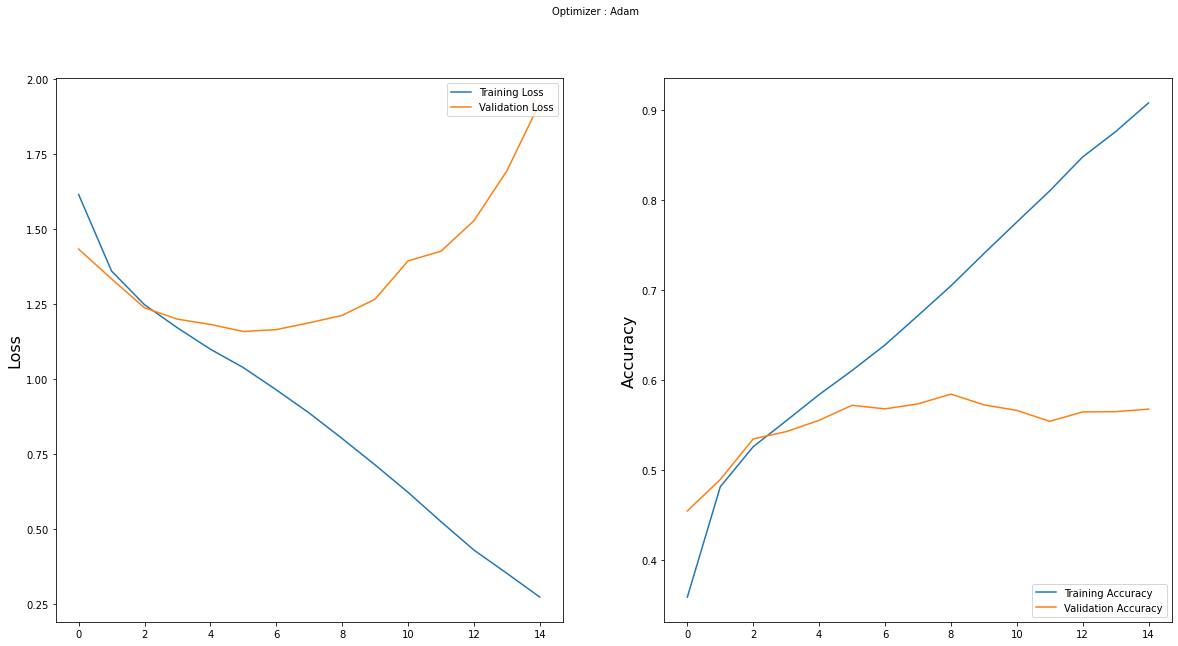

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()